##### Установка сторонних модулей через pip

In [2]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [38]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics import roc_auc_score

### Подготовка данных

##### Получение данных для анализа

In [54]:
PATH = './data/offers/data_part.json'

dataRead = []
with open(PATH, 'r', encoding='utf-8') as jsonfile:    
    dataRead = json.load(jsonfile)
    
data = pd.DataFrame(data=dataRead)
data.head()

,Unknown,Skilled,Advertising,Clip,Videoshooting,Model,TVShow,Photoshooting,Text
0,1,0,0,0,0,0,0,0,мужчин актер съемок клип съемк клип ищ геро му...
1,1,0,0,0,0,0,0,0,вниман москв т взлет ориентировочн девушк лет ...
2,1,0,0,0,0,0,0,0,х ф данил козловск пада аист мужчин лет рост р...
3,1,0,0,0,0,0,0,0,нов шанс попаст кастинг супер телевикторин уга...
4,1,0,0,0,0,0,0,0,кастинг июл девушек размер одежд парн работ ию...


##### Получение целевого признака data_y

In [55]:
columns = 'TVShow'
data_y = data[columns]
data_y.value_counts()

0    96
1     4
Name: TVShow, dtype: int64

##### Получение данных для обучения data_x

In [56]:
data_x = data['Text']
data_x.shape

(100,)

In [61]:
model_vectorizer = CountVectorizer()
vectorizer = model_vectorizer.fit(data_x)
data_x = vectorizer.transform(data_x)
data_x_without_SVD = data_x

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [62]:
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
data_x = svd.fit_transform(data_x)

ValueError: n_components must be < n_features; got 5 >= 5

In [63]:
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(data_x)

Projecting 5-dimensional data to 2D


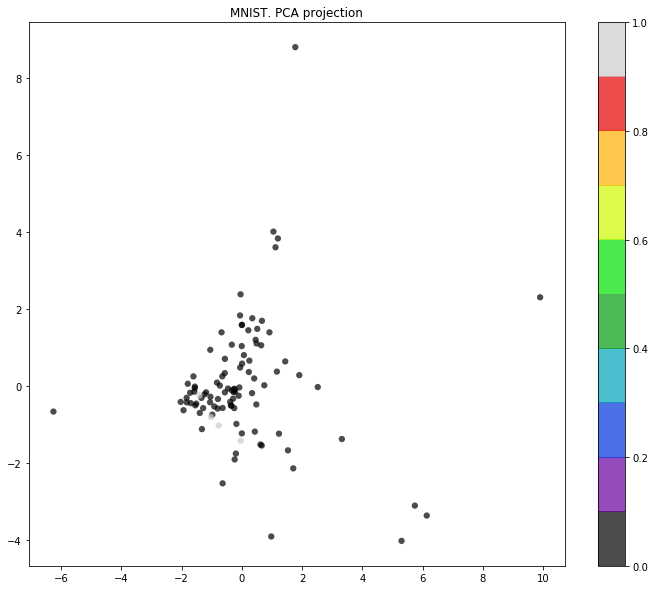

In [64]:
print('Projecting %d-dimensional data to 2D' % data_x.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=data_y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

CPU times: user 699 ms, sys: 42.8 ms, total: 742 ms
Wall time: 397 ms


Text(0.5, 1.0, 'MNIST. t-SNE projection')

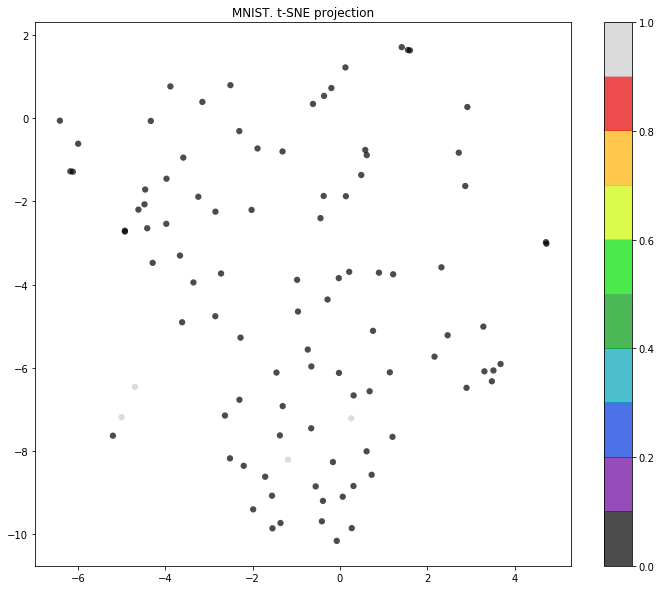

In [65]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(data_x)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

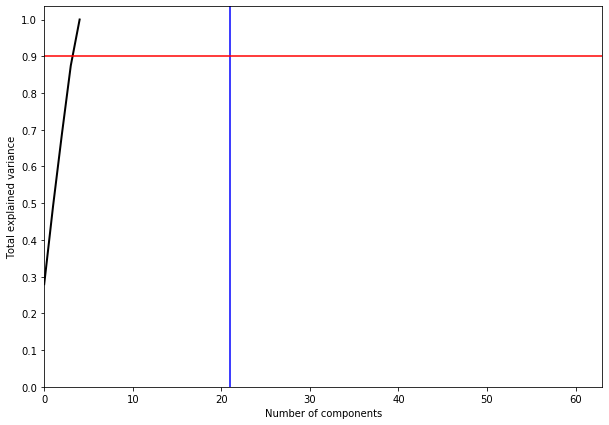

In [66]:
pca = PCA().fit(data_x)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [67]:
import lime
import lime.lime_tabular

In [68]:
explainer = lime.lime_tabular.LimeTabularExplainer(data_x, feature_names=data_x.feature_names, class_names=data_x.target_names, discretize_continuous=True)

AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

In [ ]:
https://github.com/marcotcr/lime